# Analyse de sensibilité du modèle World3-03

## Génération des plans d'expérience 

In [1]:
from os import chdir
chdir('/home/aina/git/world3-03_python/sensibility_tests_framework')

import numpy as np
from numpy.random import *
from Saltelli import Saltelli

salt = Saltelli()

model_name = ''

# Nombre d'échantillons :
n = 100 # conseillé : 10000
# Paramètres (nombre de paramètres : d) :
param = {
    'reproductive_lifetime': lambda: uniform(low = 12, high = 50, size = n),
    'initial_nonrenewable_resources': lambda: uniform(low = 1, high = 4000000000000, size = n)
}

# Construction des plans d'exprérience :
plan_1 = np.transpose(np.array([param[p_name]() for p_name in param.keys()]))
plan_2 = np.transpose(np.array([param[p_name]() for p_name in param.keys()]))

#plan_1 = np.transpose(np.array([param['policy_year'](), param['desired_food_ratio']()]))
#plan_2 = np.transpose(np.array([param['policy_year'](), param['desired_food_ratio']()]))

# Création des jeux d'entrées :
salt.generate_DoE(None, plan_1, plan_2, nboot = 100)

print('Nombre de jeux d\'entrées :', len(salt.design))

Nombre de jeux d'entrées : 400


## Runs

Boucle de calcul : attention très long en fonction du nombre de jeux d'entrées ($N(d + 2)$)

In [3]:
import pysd
w3 = pysd.load('../world3.py')
#from multiprocessing_on_dill import Pool
#pool = Pool(8)


def append_output(n_run, output):
    print(n_run, end = ", ")
    sortie = output.filter(items=['food per capita',
                                  'population',
                                  'industrial output per capita',
                                  'Persistent Pollution',
                                  'Nonrenewable Resources']).values
    sorties.append(sortie)
    

n_run = 1
sorties_brut = []
sorties = []


import pp
job_server = pp.Server()

for jeu in salt.design:
    jeu_format = dict(zip(param.keys(), jeu))
    job_server.submit(w3.run, args=(jeu_format,), callback=append_output, callbackargs=(n_run,), globals=globals())

    n_run = n_run + 1

'''

def run_w3(args, w3):
    return w3.run(args)

n = 1
for i in pool.imap_unordered(lambda a: run_w3(a, w3), [dict(zip(param.keys(), jeu)) for jeu in salt.design]):
    sorties.append(i)
    print(n, end = ", ")
    n = n + 1
'''

SyntaxError: EOL while scanning string literal (<string>, line 1)

Pour sauvegarder l'objet dans un fichier

In [9]:
import pickle
pklfile = open("w3_runs_save_2.pkl", 'wb')
pickle.dump(sorties, pklfile)
pklfile.close()

pklfile = open("w3_saltobject_2_save.pkl", 'wb')
pickle.dump(salt, pklfile)
pklfile.close()

## Analyse des sorties

Pour importer l'objet depuis un fichier

In [1]:
import pickle
pklfile = open("w3_runs_save.pkl", 'rb')
sorties = pickle.load(pklfile)
pklfile.close()

pklfile = open("w3_saltobject_save.pkl", 'rb')
salt = pickle.load(pklfile)
pklfile.close()

Génération des indices de Sobol'

In [2]:
import numpy as np
sorties_t = np.transpose(sorties)
vector_number = len(sorties_t) # nombre de vecteurs de sortie
t_steps_number = np.shape(sorties_t)[1] # nombre de pas de temps

try:
    d
except NameError:
    d = 2

    
d = 2
s = np.zeros((d, 3, vector_number, t_steps_number)) # ordre 1
t = np.zeros((d, 3, vector_number, t_steps_number)) # ordre total

progress = 1
for output_vector_n in range(vector_number): #boucle sur les vecteurs de sortie (o_n : output number)
    for step_k in range(t_steps_number): #boucle sur les pas de temps
        print(progress, end =", ")
        salt.tell(sorties_t[output_vector_n, step_k, :])
        s[..., output_vector_n, step_k] = salt.S
        t[..., output_vector_n, step_k] = salt.T
        progress = progress + 1

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

/home/steep/world3-03_python/sensibility_tests_framework/Saltelli.py:164: RuntimeWarning: invalid value encountered in less_equal
  z0_hat = ssp.norm.ppf(np.sum(booted<=booted_mean,axis=0)/np.float64(num_samples))
/home/steep/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 

1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 

In [15]:
import pickle
pklfile = open("w3_s_save_2.pkl", 'wb')
pickle.dump(s, pklfile)
pklfile.close()

import pickle
pklfile = open("w3_t_save_2.pkl", 'wb')
pickle.dump(t, pklfile)
pklfile.close()

## Test de la méthode (Ishigami)

In [16]:
from Saltelli import Saltelli
import numpy as np
from numpy.random import *

def ishigami(X):
    out = np.sin(X[:,0]) + 7 * np.sin(X[:,1])**2 + 0.1 * X[:,2]**4 * np.sin(X[:,0])
    return out

N = 10000
d = 3
X1 = np.array([uniform(low = -np.pi, high = np.pi, size = N) for _ in range(d)]).T
X2 = np.array([uniform(low = -np.pi, high = np.pi, size = N) for _ in range(d)]).T

AS = Saltelli()
AS.generate_DoE(None, X1, X2, scheme="A", nboot=100)
Param = AS.design

y = ishigami(Param)
bigY = np.array([y * normal(size=y.size, loc=t, scale=1.0/(t+1)) for t in range(10)]).T

s = np.zeros((d, 3, bigY.shape[1]))
t = np.zeros((d, 3, bigY.shape[1]))
for it in range(bigY.shape[1]): # boucle sur les vecteurs de reponses (colonnes de bigY)
    AS.tell(bigY[:,it]) # evaluation des indices
    s[...,it] = AS.S # stockage des estimations + intervalles de confiance pour les indices d'ordre un
    t[...,it] = AS.T # stockage des estimations + intervalles de confiance pour les indices totaux

## Affichage du résultat

In [27]:
import pickle
pklfile = open("w3_s_save_2.pkl", 'rb')
s = pickle.load(pklfile)
pklfile.close()

import pickle
pklfile = open("w3_t_save_2.pkl", 'rb')
t = pickle.load(pklfile)
pklfile.close()

[[0.95543493 0.17006879]
 [0.93213287 0.01512746]
 [0.96905062 0.34929992]]


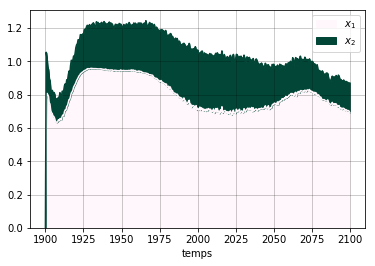

In [30]:
import matplotlib as mpl # module pour les graphiques
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # module pour les graphiques
import pandas as pd # module pour les graphiques
cmap = mpl.cm.get_cmap('PuBuGn') # choix du colormap

table = s[:,0,0,:].T # pour w3
print(s[:,:,1,100].T)
#table = t[:,0,:].T # pour ishigami

table[np.isnan(table)] = 0.0
table[table<0] = 0.0 # on met a zero les valeurs negatives (les indices sont censes etre positifs)
df = pd.DataFrame(table) # construction du data.frame
ax = df.plot(kind='area', stacked =True, cmap = cmap, legend=True, title=False) # creation du stacked area chart
ax.grid(color='black', linestyle='-', linewidth=1, alpha=0.2) # ajout d'une grille en background

# modification des labels des ticks de l'axe des abscisse
labels = (ax.get_xticks()/2+1900)
labels = labels.astype(np.int)
ax.set_xticklabels(labels)

# modification du titre de l'axe des abscisse
ax.set_xlabel("temps", color='black')

# changer la legende
leg = ax.legend_
X1_patch = mpatches.Patch(color=leg.legendHandles[0].get_facecolor(), label=r'$x_1$')
X2_patch = mpatches.Patch(color=leg.legendHandles[1].get_facecolor(), label=r'$x_2$')
plt.legend(handles=[X1_patch, X2_patch])

# commande pour sauver la figure en pdf avec fond transparent et bords rognes
# plt.savefig("path_to_save/name_file.pdf", dpi=200, bbox_inches='tight', transparent=True)